# Assignment

#### Github repository:
- [My Github Repo](https://github.com/rrrichardz/LSE_DA_Assignment_Predicting-Future-Outcomes)

## Week 1: applying predictive models

### Import libraries

In [1]:
# Import libraries.
import statsmodels.api as sm
from sklearn import datasets
import numpy as np
from sklearn import linear_model
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

### Load data file

In [2]:
# Import CSV file.
lego = pd.read_csv("lego.csv")

# View the DataFrame.
lego.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,29.99,2,277,4.0,0,20
1,19,19.99,2,168,4.0,2,20
2,19,12.99,11,74,4.3,2,20
3,5,99.99,23,1032,3.6,0,20
4,5,79.99,14,744,3.2,1,20


In [3]:
# View more information.
lego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  int64  
 1   list_price         12261 non-null  float64
 2   num_reviews        12261 non-null  int64  
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   12261 non-null  float64
 5   review_difficulty  12261 non-null  int64  
 6   country            12261 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 670.6 KB


In [4]:
# Find missing values.
lego.isnull().sum()

ages                 0
list_price           0
num_reviews          0
piece_count          0
play_star_rating     0
review_difficulty    0
country              0
dtype: int64

### Clean the data

In [5]:
# Use Pandas's duplicated() function to check the user_id column.
print(lego[lego.duplicated()])

       ages  list_price  num_reviews  piece_count  play_star_rating  \
195       0      9.9900            5          143               4.6   
196       0      9.9900            3          122               2.7   
197       0      9.9900            1          135               1.0   
198       0      9.9900            2          108               3.5   
199       0     19.9900            0          209               0.0   
...     ...         ...          ...          ...               ...   
12256    23     36.5878            6          341               4.4   
12257    23     24.3878            8          217               4.1   
12258    23     24.3878           18          233               4.6   
12259    20     12.1878            1           48               5.0   
12260    20     12.1878           11          109               4.5   

       review_difficulty  country  
195                    2       20  
196                    4       20  
197                    4       20  
198

In [6]:
# Use 'drop_duplicate' to return the Series without the duplicate values.
lego_drop = lego.drop_duplicates()

lego_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10762 entries, 0 to 12239
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               10762 non-null  int64  
 1   list_price         10762 non-null  float64
 2   num_reviews        10762 non-null  int64  
 3   piece_count        10762 non-null  int64  
 4   play_star_rating   10762 non-null  float64
 5   review_difficulty  10762 non-null  int64  
 6   country            10762 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 672.6 KB


In [7]:
# Use 'drop' to remove irrelevant columns from the DataFrame.
# and specify the column names:
# Specify that 'review_difficulty' and 'country' are columns (i.e. 'axis_1')
lego_clean = lego_drop.drop(["review_difficulty", "country"], axis = 1)

lego_clean.head()

,ages,list_price,num_reviews,piece_count,play_star_rating
0,19,29.99,2,277,4.0
1,19,19.99,2,168,4.0
2,19,12.99,11,74,4.3
3,5,99.99,23,1032,3.6
4,5,79.99,14,744,3.2


### Find more information about the data set

In [8]:
# View minimum, maximum and more statistical values about the DataFrame.
lego_clean.describe()

,ages,list_price,num_reviews,piece_count,play_star_rating
count,10762.000000,10762.000000,10762.000000,10762.000000,10762.000000
mean,17.053986,67.800933,15.675153,508.585393,3.787484
std,7.908157,95.004742,36.238139,834.056159,1.580338
min,0.000000,2.272400,0.000000,1.000000,0.000000
25%,11.000000,21.947800,2.000000,99.000000,3.800000
50%,19.000000,36.587800,5.000000,229.000000,4.400000
75%,23.000000,73.187800,12.000000,557.000000,4.700000
max,30.000000,1104.870000,367.000000,7541.000000,5.000000


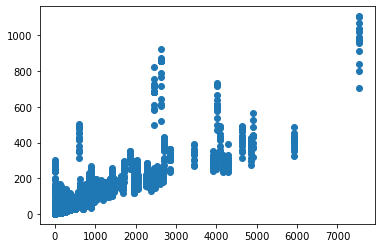

In [9]:
# Create visualisations to find trends.
# Define the variables.
y = lego_clean['list_price'].values.reshape(-1, 1)
x = lego_clean['piece_count'].values.reshape(-1, 1)
z = lego_clean['ages']

plt.scatter(x, y)

# Finding trends on how number of pieces affect listing price.

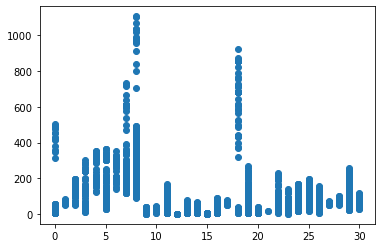

In [10]:
plt.scatter(z, y)

# Finding trends on how target age affect listing price.

### Split the data into train and test subsets

In [11]:
# Create train (70%) and test (30%) subset.
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7,
                                                   random_state = 0)

### Apply simple linear regression on train subsets

In [12]:
lm = LinearRegression()

# Fit the model.
lm.fit(x, y)

LinearRegression()

In [13]:
# Linear regression; fitting the model.
lm.fit(x_train, y_train)

LinearRegression()

In [14]:
# Predict the training set values.
y_pred = lm.predict(x_train)

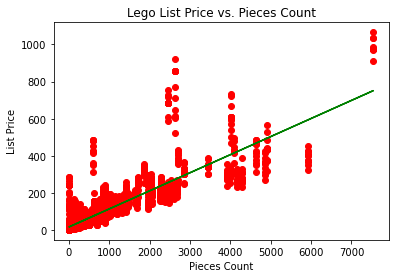

In [15]:
# Visualise the train data plot.
# [1] Create a scatterplot (with red data points).
plt.scatter(x_train, y_train, color = 'red')
# [2] Create a regression line in green.
plt.plot(x_train, y_pred, color = 'green')
# [3] Set the title for the graph.
plt.title("Lego List Price vs. Pieces Count")
# [4] set the label for the x-axis.
plt.xlabel("Pieces Count")
# [5] Set the label for the y-axis.
plt.ylabel("List Price")
# [6] Print the graph.
plt.show()

In [16]:
# Print R-squared value of the training data.
print(lm.score(x_train, y_train))

0.758062050923466


In [17]:
# Print the intercept value.
print("Intercept value: ", lm.intercept_)
# Print the coefficient value.
print("Coefficient value: ", lm.coef_)

Intercept value:  [18.0026225]
Coefficient value:  [[0.09721059]]


### Apply simple linear regression on test subsets

In [18]:
# Linear regression; fitting the model.
lm.fit(x_test, y_test)

LinearRegression()

In [19]:
# Predict the test set values.
y_pred = lm.predict(x_test)

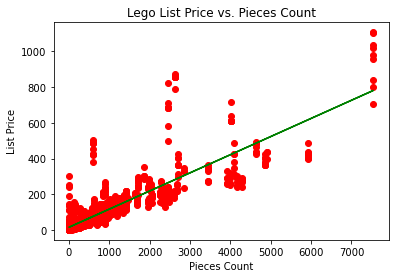

In [20]:
# Visualise the test data plot.
# [1] Create a scatterplot (with red data points).
plt.scatter(x_test, y_test, color = 'red')
# [2] Create a regression line in green.
plt.plot(x_test, y_pred, color = 'green')
# [3] Set the title for the graph.
plt.title("Lego List Price vs. Pieces Count")
# [4] set the label for the x-axis.
plt.xlabel("Pieces Count")
# [5] Set the label for the y-axis.
plt.ylabel("List Price")
# [6] Print the graph.
plt.show()

In [21]:
# Print R-squared value of the test data.
print(lm.score(x_test, y_test))

0.7300625674533734


In [22]:
# Print the intercept value.
print("Intercept value: ", lm.intercept_)
# Print the coefficient value.
print("Coefficient value: ", lm.coef_)

Intercept value:  [17.1676105]
Coefficient value:  [[0.10118382]]


### Apply multiple linear regression on train and test subsets

In [23]:
# Define the variables.
y = lego_clean['list_price']
X = lego_clean[['piece_count', 'ages']]

In [24]:
# Split the data in 'train' (70%) and 'test' (30%) subsets:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split( \
X, y, test_size = 0.3, random_state = 0)

In [25]:
# Fit the regression model.
mlr = linear_model.LinearRegression()

mlr.fit(X_train, y_train)

# Call the predictions for X (array).
mlr.predict(X_train)

array([ 38.93525767,  92.09641097,  30.86352392, ..., 296.57345547,
        26.50818484,  92.09641097])

In [26]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X_train, y_train))

R-squared:  0.7580683411672539


In [27]:
# Run model on 'test' subset.
mlr = LinearRegression()

# Fit the model.
mlr.fit(X_test, y_test)

# Call the predictions for X in the test subset.
y_pred_mlr = mlr.predict(X_test)

# Print the predictions.
print("Prediction for test subset: {}".format(y_pred_mlr))

Prediction for test subset: [100.90477041  23.96420263  67.9004469  ... 112.65895814  39.03240079
  59.64146251]


In [28]:
# Testing the model using the 'statsmodels' OLS library:
# Fit the model with the added constant.
model = sm.OLS(y_test, sm.add_constant(X_test)).fit()

# Set the predicted response vector.
y_pred = model.predict(sm.add_constant(X_test))

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             list_price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     4364.
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:09:30   Log-Likelihood:                -17432.
No. Observations:                3229   AIC:                         3.487e+04
Df Residuals:                    3226   BIC:                         3.489e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          18.7753      2.401      7.819      

C:\Users\richa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
# Predictions on the test subset.
y_pred_mlr = mlr.predict(X_test)
print('Prediction for test set: {}'.format(y_pred_mlr))

Prediction for test set: [100.90477041  23.96420263  67.9004469  ... 112.65895814  39.03240079
  59.64146251]


In [30]:
# Determine the R-squared, mean absolute error and mean square error.
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)

print('R-squared: {:.2f}'.format(mlr.score(X_test, y_test) * 100))
print('Mean Absolute Error: ', meanAbErr)
print('Mean Squared Error: ', meanSqErr)

R-squared: 73.01
Mean Absolute Error:  22.898052380954084
Mean Squared Error:  2862.8680532433696


### Apply models to determine the optimal prices

In [31]:
# [a] Determine price for Lego product with 8000 pieces:
predicted_price = lm.predict([[8000]])

print('Predicted Price: \n' , predicted_price)

Predicted Price: 
 [[826.63817079]]


In [32]:
# [b] Determine price for Lego product with 8000 pieces that are most
# likely be purchased by 30-year-old customer:

# Create a new variable 'New_Pieces' and define it as 8000.
New_Pieces = 8000
# Create a new variable 'New_Ages' and define it as 30.
New_Ages = 30

print('Predicted Price: \n', mlr.predict([[New_Pieces, New_Ages]]))

Predicted Price: 
 [824.52641539]


C:\Users\richa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Week 3: sentiment analysis

### Import libraries and data file

In [26]:
# Import all necessary libraries.
import nltk
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Install the required tokenisation model.
nltk.download('punkt')

# Install the required tokenisation function.
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

nltk.download ('stopwords')
from nltk.corpus import stopwords

from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\richa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\richa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Import the data file.
game_reviews = pd.read_csv("game_reviews.csv")

# View the DataFrame.
game_reviews.head()

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400,NaN
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,Amazing buy! Bought it as a gift for our new d...,Five Stars,1488412800,NaN
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,As my review of GF9's previous screens these w...,Money trap,1486512000,NaN


In [3]:
print(game_reviews.shape)

(15000, 9)


In [4]:
# Determine missing values in DataFrame.
game_reviews.isnull().sum()

overall               0
verified              0
reviewTime            0
reviewerID            0
reviewerName          0
reviewText           10
summary               2
unixReviewTime        0
image             14840
dtype: int64

In [5]:
# Remove missing values from DataFrame.
game_reviews.dropna(subset = ['reviewText'], inplace = True)

game_reviews.dropna(subset = ['summary'], inplace = True)

print(game_reviews.shape)

(14988, 9)


### Prepare the data

In [6]:
# Transform data to lowercase.
game_reviews['reviewText'] = game_reviews['reviewText'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the results.
game_reviews['reviewText'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: reviewText, dtype: object

In [7]:
# Remove punctuation.
game_reviews['reviewText'] = game_reviews['reviewText'].str.replace('[^\w\s]','')

# Preview the results.
game_reviews['reviewText'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: reviewText, dtype: object

In [8]:
# Check the number of duplicate values in the 'reviewText' column.
game_reviews.reviewText.duplicated().sum()

909

In [9]:
# Drop duplicates.
reviews = game_reviews.drop_duplicates(subset = ['reviewText'])

In [10]:
# Preview data.
reviews.reset_index(inplace = True)
reviews.head()

,index,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
0,0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,when it comes to a dms screen the space on the...,The fact that 50% of this space is wasted on a...,1474502400,NaN
1,1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,an open letter to galeforce9 your unpainted mi...,Another worthless Dungeon Master's screen from...,1474156800,NaN
2,2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,nice art nice printing why two panels are fill...,"pretty, but also pretty useless",1473638400,NaN
3,3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,amazing buy bought it as a gift for our new dm...,Five Stars,1488412800,NaN
4,4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,as my review of gf9s previous screens these we...,Money trap,1486512000,NaN


In [30]:
reviews.shape

(14079, 10)

### Apply tokenisation

In [11]:
# Tokenise the words.
reviews['tokens'] = reviews['reviewText'].apply(word_tokenize)

# Preview the results.
reviews['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [12]:
# Combine all tokens into one list.
all_tokens = []
for i in range(reviews.shape[0]):
    all_tokens = all_tokens + reviews['tokens'][i]

In [13]:
# Compute the tokens with the maximum frequency.
# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

fdist

FreqDist({'the': 32797, 'to': 21453, 'and': 21000, 'a': 18570, 'it': 15144, 'i': 12844, 'game': 12378, 'this': 12257, 'is': 12169, 'of': 11815, ...})

In [14]:
# Filter out tokens that are neither alphabets or numbers.
# (to eliminate punctuation marks etc)
tokens1 = [word for word in all_tokens if word.isalnum()]

### Eliminate stopwords

In [15]:
# Create a set of Enligsh stop words.
english_stopwords = set(stopwords.words('english'))

In [16]:
# Create a list of tokens without stop words.
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]

In [17]:
# Define an empty string variable.
tokens2_string = ''
for value in tokens2:
    tokens2_string = tokens2_string + value + ' '

### Visualise the tokens on a word cloud

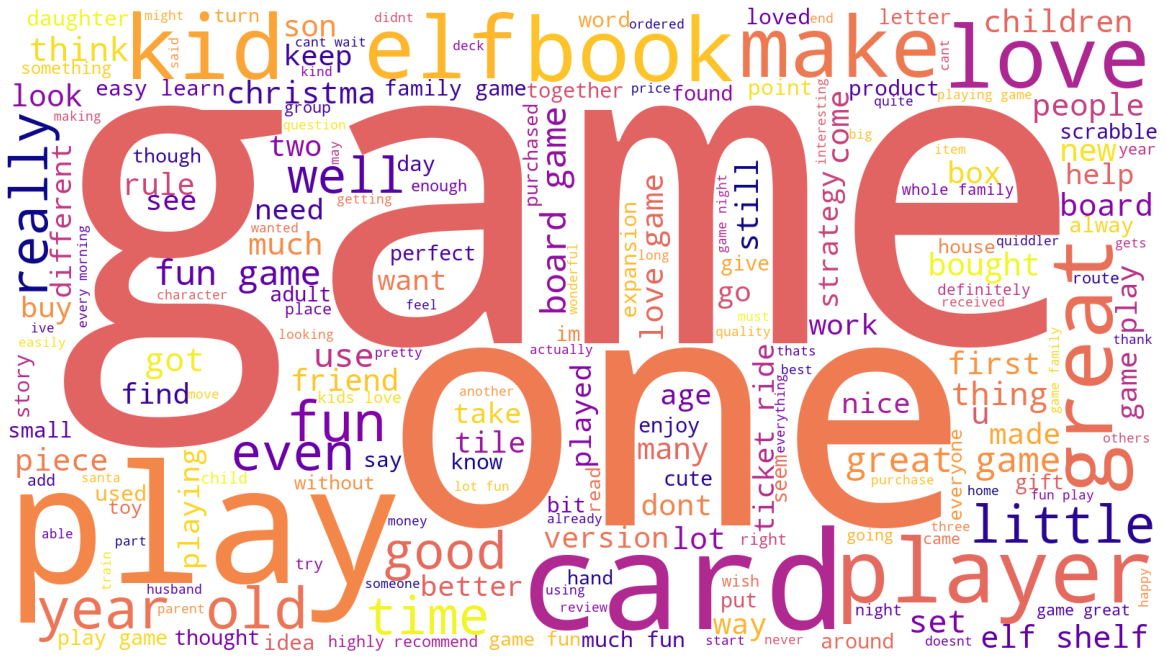

In [18]:
# Set the colour palette.
sns.set(color_codes = True)

# Create a word cloud object.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color = 'white', 
                colormap = 'plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### Generate polarity score

In [22]:
# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
reviews['polarity'] = reviews['reviewText'].apply(generate_polarity)

# Preview the results.
reviews['polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity, dtype: float64

### Visualise polarity score

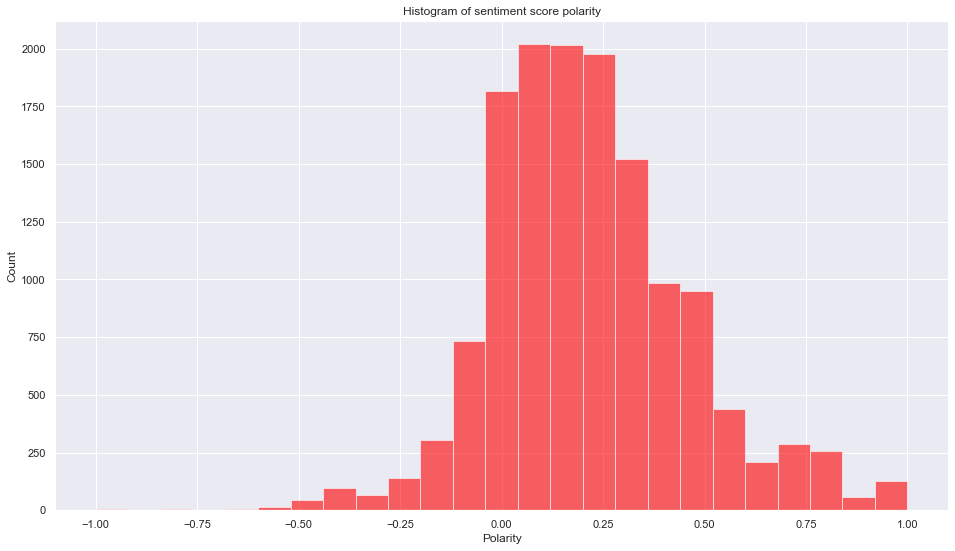

In [23]:
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize = (16, 9))

# Define the bars.
n, bins, patches = plt.hist(reviews['polarity'], num_bins, facecolor = 'red',
                           alpha = 0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Histogram of sentiment score polarity', fontsize = 12)

plt.show()

### Extract top 20 positive and 20 negative reviews

In [24]:
# Create a DataFrame.
positive_sentiment = reviews.nlargest(20, 'polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['reviewText', 'reviewerName',
                                         'polarity', 'summary']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset = ['reviewText'],
                                        **{'width': '1200px'})

,reviewText,reviewerName,polarity,summary
7,came in perfect condition,anon9df0,1.000000,Five Stars
164,awesome book,Monique K.,1.000000,Five Stars
193,awesome gift,Honest purchaser,1.000000,Five Stars
489,excellent activity for teaching selfmanagement skills,MIZZKITTY49,1.000000,Five Stars
517,perfect just what i ordered,L. G. Berkowitz,1.000000,Five Stars
583,wonderful product,Former Employee,1.000000,Five Stars
601,delightful product,Pam Walley,1.000000,Five Stars
613,wonderful for my grandson to learn the resurrection story,rbaker,1.000000,Five Stars
782,perfect,Kate,1.000000,Aquire game
922,awesome,LUDWIG,1.000000,Five Stars


In [25]:
# Create a DataFrame.
negative_sentiment = reviews.nsmallest(20, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['reviewText', 'reviewerName',
                                         'polarity', 'summary']]

# Adjust the column width.
negative_sentiment.style.set_properties(subset = ['reviewText'],
                                        **{'width': '1200px'})

,reviewText,reviewerName,polarity,summary
207,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,carole jordan,-1.000000,BORING UNLESS YOU ARE A CRAFT PERSON WHICH I AM ...
1987,kids did not like it thought it was boring,Barbara G. Staggs,-1.000000,Not so much fun
3217,some of the suggestions are disgusting,Rbysue92,-1.000000,One Star
7811,awful we did not receive what was advertised we paid 30 for the boxes set with book we got the elf in a bag without the book,David San Julian,-1.000000,Not What Was Advertised
7514,was the elf on the shelf but it didnt have the dvd i was very disappointed,Sharon,-0.975000,Three Stars
8860,i havent even taken it out of the box yet but its already falling apart i contacted customer service and never even got a response i am very disappointed in this product,Amazon Customer,-0.975000,Poor quality. Falling apart in multiple places.
8197,i hate the holidays bcuz of the elf he was disgusting i hate him with my life he doesnot leave the shelf alone,Amazon Customer,-0.866667,I hate the holidays bcuz of the Elf
12384,i do not under stand how you keep score or read the scoring i i do not like that at all i can never play score with anyone at all i hate that i cant play points,CriticizeK,-0.800000,What i do not under stand
8530,cliche and stupid i should not drink and amazon,T. Gage,-0.800000,Hahaha. Ho Ho Ho.
8637,just stupid,JGR,-0.800000,One Star


### Generate a document-term matrix

In [27]:
# Use a tokenizer object to remove unwanted elements.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer object to process the comments.
cv = CountVectorizer(lowercase = True, stop_words = 'english',
                     ngram_range = (1, 1), tokenizer = token.tokenize)

# Apply the transformation to the comment data.
cvs = cv.fit_transform(reviews['reviewText'])

In [29]:
# Create a DataFrame.
dt = pd.DataFrame(cvs.todense()).iloc[:20]  

# Name the columns.
dt.columns = cv.get_feature_names()

# Transpose columns and headings.
document_term_matrix = dt.T

# Update the column names.
document_term_matrix.columns = ['Doc ' + str(i) for i in range(1, 21)]

# Get the totals.
document_term_matrix['total_count'] = document_term_matrix.sum(axis = 1)

# Identify the top 10 words 
document_term_matrix = document_term_matrix.sort_values(by = 'total_count', 
                                                        ascending = False)[:15] 

# Display the results.
print(document_term_matrix.drop(columns = ['total_count']).head(15))

            Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
book            0      0      0      0      0      0      0      0      0   
screen          2      2      2      0      0      0      1      0      1   
card            0      0      0      0      0      0      0      0      0   
adventure       0      2      4      0      0      0      0      0      0   
sleights        0      0      0      0      0      0      0      0      0   
map             0      1      3      0      0      0      0      0      1   
useful          0      2      5      0      0      0      0      0      0   
use             0      1      4      0      0      0      0      0      0   
screens         0      2      2      0      1      0      1      0      0   
completely      2      0      0      0      1      0      0      0      0   
dm              0      2      1      1      0      0      0      0      0   
like            0      0      0      0      0      0      0      0      1   

<AxesSubplot:>

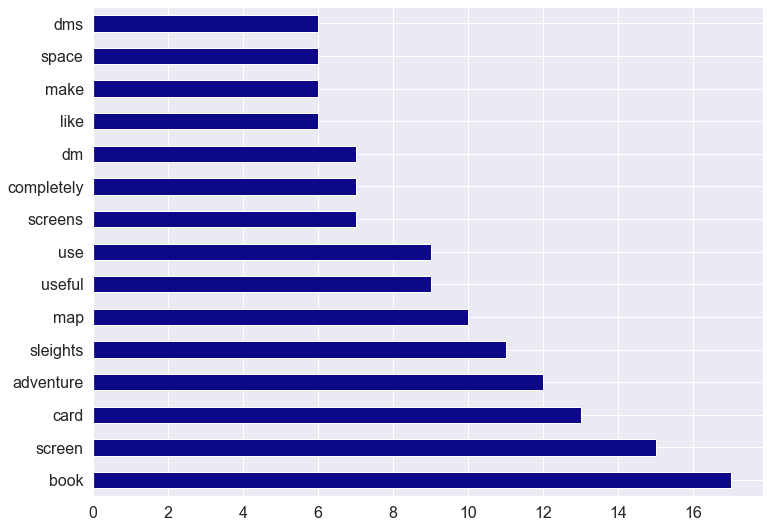

In [30]:
# Create visualisation.
document_term_matrix['total_count'].plot.barh(figsize = (12, 9), fontsize = 16,
                                             colormap = 'plasma')